# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [12]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [13]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    [n,] = Y_train.shape
    Prob_Y_neg = np.count_nonzero(Y_train == -1)/n
    Prob_Y_pos = 1 - Prob_Y_neg

    result = np.where(Y_train == 1)

    X_train_pos = X_train[Y_train == 1, :]
    X_train_neg = X_train[Y_train == -1, :]

    mu_pos = np.mean(X_train_pos, axis = 0)
    mu_neg = np.mean(X_train_neg, axis = 0)

    Y_test_pred = np.empty((0,))
    for x in X_test:
        P_X_Y_pos = Prob_Y_pos*np.exp(-.5*np.dot((x-mu_pos), np.transpose(x-mu_pos)))
        P_X_Y_neg = Prob_Y_neg*np.exp(-.5*np.dot((x-mu_neg), np.transpose(x-mu_neg)))
        if P_X_Y_pos/(P_X_Y_pos + P_X_Y_neg) > .5:
            Y_test_pred = np.append(Y_test_pred, 1)
        else:
            Y_test_pred = np.append(Y_test_pred, -1)
    return Y_test_pred

    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    [n,] = Y_train.shape
    Prob_Y_neg = np.count_nonzero(Y_train == -1)/n
    Prob_Y_pos = 1 - Prob_Y_neg

    result = np.where(Y_train == 1)

    X_train_pos = X_train[Y_train == 1, :]
    X_train_neg = X_train[Y_train == -1, :]

    mu = np.expand_dims(X_train.mean(axis = 0), axis=1)
    mu_pos = np.expand_dims(X_train_pos.mean(axis = 0), axis=1)
    mu_neg = np.expand_dims(X_train_neg.mean(axis = 0), axis=1)
    
    sigma = np.cov(np.transpose(X_train))
    
    Y_test_pred = np.empty((0,))
    for x in X_test:
        x = np.expand_dims(x, axis=1)
        P_X_Y_pos = Prob_Y_pos*np.exp(-.5*np.dot(np.transpose(x-mu_pos), np.dot(np.linalg.inv(sigma), x-mu_pos)))
        P_X_Y_neg = Prob_Y_neg*np.exp(-.5*np.dot(np.transpose(x-mu_neg), np.dot(np.linalg.inv(sigma), x-mu_neg)))

        if P_X_Y_pos/(P_X_Y_pos + P_X_Y_neg) > .5:
            Y_test_pred = np.append(Y_test_pred, 1)
        else:
            Y_test_pred = np.append(Y_test_pred, -1)
    return Y_test_pred
    

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    [n,] = Y_train.shape
    Prob_Y_neg = np.count_nonzero(Y_train == -1)/n
    Prob_Y_pos = 1 - Prob_Y_neg

    result = np.where(Y_train == 1)

    X_train_pos = X_train[Y_train == 1, :]
    X_train_neg = X_train[Y_train == -1, :]

    mu_pos = np.expand_dims(X_train_pos.mean(axis = 0), axis=1)
    mu_neg = np.expand_dims(X_train_neg.mean(axis = 0), axis=1)
    
    sigma_pos = np.cov(np.transpose(X_train_pos))
    sigma_neg = np.cov(np.transpose(X_train_neg))
    
    Y_test_pred = np.empty((0,))
    for x in X_test:
        x = np.expand_dims(x, axis=1)
        P_X_Y_pos = Prob_Y_pos*np.exp(-.5*np.dot(np.transpose(x-mu_pos), np.dot(np.linalg.inv(sigma_pos), x-mu_pos)))/np.sqrt(np.linalg.det(sigma_pos))
        P_X_Y_neg = Prob_Y_neg*np.exp(-.5*np.dot(np.transpose(x-mu_neg), np.dot(np.linalg.inv(sigma_neg), x-mu_neg)))/np.sqrt(np.linalg.det(sigma_neg))

        if P_X_Y_pos/(P_X_Y_pos + P_X_Y_neg) > .5:
            Y_test_pred = np.append(Y_test_pred, 1)
        else:
            Y_test_pred = np.append(Y_test_pred, -1)
    return Y_test_pred
    
    

In [14]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


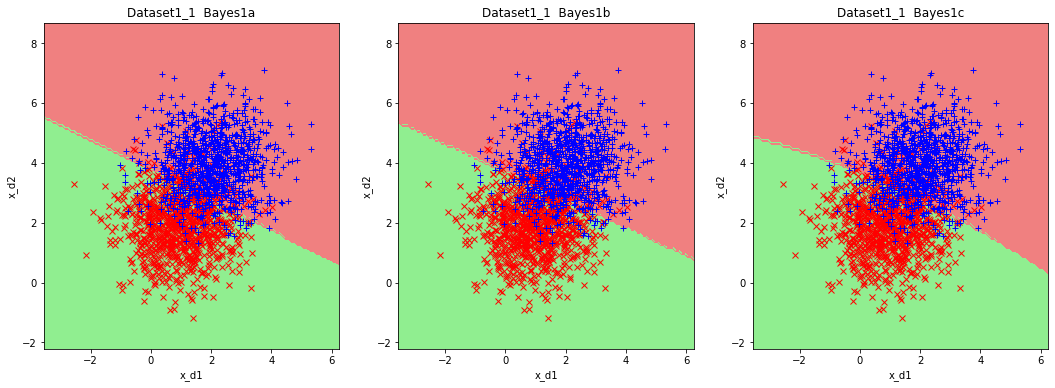

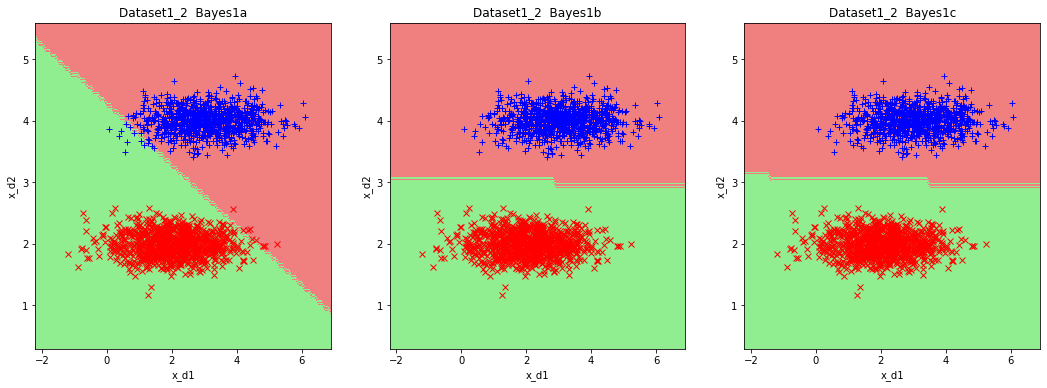

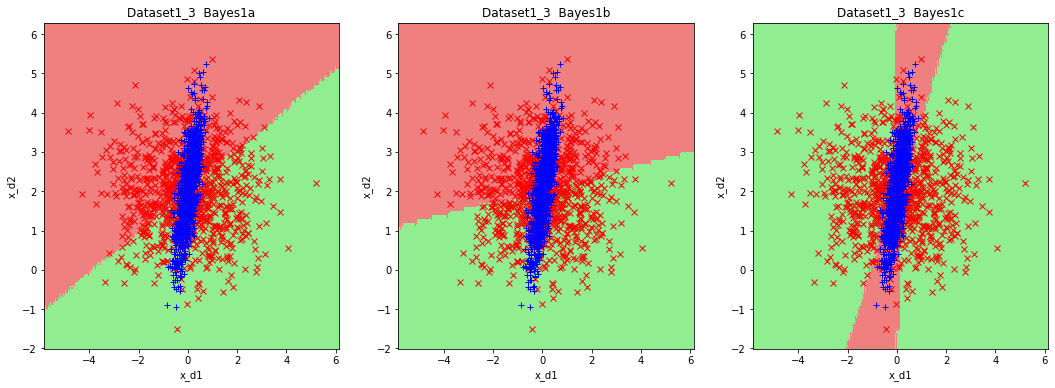

In [15]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

def plots(data, nam):
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    
    
    min1, max1 = X_test[:, 0].min()-1, X_test[:, 0].max()+1
    min2, max2 = X_test[:, 1].min()-1, X_test[:, 1].max()+1
    
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    xx, yy = np.meshgrid(x1grid, x2grid)
    
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    
    grid = np.hstack((r1,r2))
    
    fig = plt.figure(figsize=(18, 6))
    
    Y_pred_test_1a = Bayes1a(X_train, Y_train, grid)
    zz = Y_pred_test_1a.reshape(xx.shape)
    
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.contourf(xx, yy, zz, colors=['lightcoral', 'lightgreen'])
    Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
    ax1.plot(X_test[Y_train == 1, 0], X_train[Y_train == 1, 1], 'rx')
    ax1.plot(X_train[Y_train == -1, 0], X_train[Y_train == -1, 1], 'b+')
    ax1.set_title('Dataset1_' + str(nam) + '  Bayes1a')
    ax1.set_xlabel('x_d1')  
    ax1.set_ylabel('x_d2')
    
    Y_pred_test_1b = Bayes1b(X_train, Y_train, grid)
    zz = Y_pred_test_1b.reshape(xx.shape)
    
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.contourf(xx, yy, zz, colors=['lightcoral', 'lightgreen'])
    Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
    ax2.plot(X_test[Y_train == 1, 0], X_train[Y_train == 1, 1], 'rx')
    ax2.plot(X_train[Y_train == -1, 0], X_train[Y_train == -1, 1], 'b+')
    ax2.set_title('Dataset1_' + str(nam) + '  Bayes1b')
    ax2.set_xlabel('x_d1')  
    ax2.set_ylabel('x_d2')
    
    Y_pred_test_1c = Bayes1c(X_train, Y_train, grid)
    zz = Y_pred_test_1c.reshape(xx.shape)
    
    ax3 = fig.add_subplot(1, 3, 3)
    ax3.contourf(xx, yy, zz, colors=['lightcoral', 'lightgreen'])
    Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)
    ax3.plot(X_test[Y_train == 1, 0], X_train[Y_train == 1, 1], 'rx')
    ax3.plot(X_train[Y_train == -1, 0], X_train[Y_train == -1, 1], 'b+')
    ax3.set_title('Dataset1_' + str(nam) + '  Bayes1c')
    ax3.set_xlabel('x_d1')  
    ax3.set_ylabel('x_d2')
    

plots(np.load('../../Data/dataset1_1.npz'), 1)

plots(np.load('../../Data/dataset1_2.npz'), 2)

plots(np.load('../../Data/dataset1_3.npz'), 3)

** Cell type : TextWrite ** 
(Write your observations and table of errors here)

<b>Observations</b><br><br>
i) Data from dataset1_1 seems out be distributed as gaussian with Identity covariance from plot and hence all Bayes1_ classifier gives almost same train and test errors.<br>
ii) It can be noticed that the dataset1_2 is linearly seperable and also similar variance(by looking at class distribution) and hence Bayes1_b gives no classification error. Bayes1_c also gives zero error may be due to ML estimates of $\Sigma_+$ and $\Sigma_-$ comes out be very close. Bayes1_a assumes little more about data which results in some error for dataset1_2 <br>
iii) From plot for dataset1_3 the two class' distributions seems to be having very differnt variation from each other so Bayes1c classifies the data well with lesser training and test errors than other Bayes1_.<br>


<br> <b>Error matrices</b><br>

               
   Train_Error( $\frac{no. of wrong predictions*100}{total predictions}$ )
                        
|            | Bayes1a | Bayes1b | Bayes1c |
|------------|---------|---------|---------|
| dataset1_1 | 13.15   | 13.1    | 13.15   |
| dataset1_2 | .8      | 0.0     | 0.0     |
| dataset1_3 | 48.9    | 49.0    | 11.55   |                        
                        
                                         
                         
   Test_Error

|            | Bayes1a | Bayes1b | Bayes1c |
|------------|---------|---------|---------|
| dataset1_1 | 12.6    | 12.45   | 12.45   |
| dataset1_2 | 0.85    | 0.0     | 0.0     |
| dataset1_3 | 49.7    | 49.5    | 13.5   |


** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [16]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    [n,] = Y_train.shape
    Prob_Y_1 = np.count_nonzero(Y_train == 1)/n
    Prob_Y_2 = np.count_nonzero(Y_train == 2)/n
    Prob_Y_3 = np.count_nonzero(Y_train == 3)/n
    Prob_Y_4 = np.count_nonzero(Y_train == 4)/n

    X_train_1 = X_train[Y_train == 1, :]
    X_train_2 = X_train[Y_train == 2, :]
    X_train_3 = X_train[Y_train == 3, :]
    X_train_4 = X_train[Y_train == 4, :]


    mu_1 = np.expand_dims(np.mean(X_train_1, axis = 0), axis=1)
    mu_2 = np.expand_dims(np.mean(X_train_2, axis = 0), axis=1)
    mu_3 = np.expand_dims(np.mean(X_train_3, axis = 0), axis=1)
    mu_4 = np.expand_dims(np.mean(X_train_4, axis = 0), axis=1)

    Y_test_pred = np.empty((0,1))
    for x in X_test:
        x = np.expand_dims(x, axis=1)
        P_X_Y_1 = Prob_Y_1*np.exp(-.5*np.dot(np.transpose(x-mu_1), x-mu_1))
        P_X_Y_2 = Prob_Y_2*np.exp(-.5*np.dot(np.transpose(x-mu_2), x-mu_2))
        P_X_Y_3 = Prob_Y_3*np.exp(-.5*np.dot(np.transpose(x-mu_3), x-mu_3))
        P_X_Y_4 = Prob_Y_4*np.exp(-.5*np.dot(np.transpose(x-mu_4), x-mu_4))
        max_prob = max([P_X_Y_1, P_X_Y_2, P_X_Y_3, P_X_Y_4])
        if P_X_Y_1 == max_prob:
            Y_test_pred = np.append(Y_test_pred, 1)
        elif P_X_Y_2 == max_prob:
            Y_test_pred = np.append(Y_test_pred, 2)
        if P_X_Y_3 == max_prob:
            Y_test_pred = np.append(Y_test_pred, 3)
        elif P_X_Y_4 == max_prob:
            Y_test_pred = np.append(Y_test_pred, 4)

    return Y_test_pred
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    [n,] = Y_train.shape
    Prob_Y_1 = np.count_nonzero(Y_train == 1)/n
    Prob_Y_2 = np.count_nonzero(Y_train == 2)/n
    Prob_Y_3 = np.count_nonzero(Y_train == 3)/n
    Prob_Y_4 = np.count_nonzero(Y_train == 4)/n

    X_train_1 = X_train[Y_train == 1, :]
    X_train_2 = X_train[Y_train == 2, :]
    X_train_3 = X_train[Y_train == 3, :]
    X_train_4 = X_train[Y_train == 4, :]


    mu_1 = np.expand_dims(np.mean(X_train_1, axis = 0), axis=1)
    mu_2 = np.expand_dims(np.mean(X_train_2, axis = 0), axis=1)
    mu_3 = np.expand_dims(np.mean(X_train_3, axis = 0), axis=1)
    mu_4 = np.expand_dims(np.mean(X_train_4, axis = 0), axis=1)

    sigma = np.cov(np.transpose(X_train))

    Y_test_pred = np.empty((0,1))
    for x in X_test:
        x = np.expand_dims(x, axis=1)
        P_X_Y_1 = Prob_Y_1*np.exp(-.5*np.dot(np.transpose(x-mu_1), np.dot(np.linalg.inv(sigma), x-mu_1)))
        P_X_Y_2 = Prob_Y_2*np.exp(-.5*np.dot(np.transpose(x-mu_2), np.dot(np.linalg.inv(sigma), x-mu_2)))
        P_X_Y_3 = Prob_Y_3*np.exp(-.5*np.dot(np.transpose(x-mu_3), np.dot(np.linalg.inv(sigma), x-mu_3)))
        P_X_Y_4 = Prob_Y_4*np.exp(-.5*np.dot(np.transpose(x-mu_4), np.dot(np.linalg.inv(sigma), x-mu_4)))
        max_prob = max([P_X_Y_1, P_X_Y_2, P_X_Y_3, P_X_Y_4])
        if P_X_Y_1 == max_prob:
            Y_test_pred = np.append(Y_test_pred, 1)
        elif P_X_Y_2 == max_prob:
            Y_test_pred = np.append(Y_test_pred, 2)
        if P_X_Y_3 == max_prob:
            Y_test_pred = np.append(Y_test_pred, 3)
        elif P_X_Y_4 == max_prob:
            Y_test_pred = np.append(Y_test_pred, 4)

    return Y_test_pred

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    [n,] = Y_train.shape
    Prob_Y_1 = np.count_nonzero(Y_train == 1)/n
    Prob_Y_2 = np.count_nonzero(Y_train == 2)/n
    Prob_Y_3 = np.count_nonzero(Y_train == 3)/n
    Prob_Y_4 = np.count_nonzero(Y_train == 4)/n

    X_train_1 = X_train[Y_train == 1, :]
    X_train_2 = X_train[Y_train == 2, :]
    X_train_3 = X_train[Y_train == 3, :]
    X_train_4 = X_train[Y_train == 4, :]


    mu_1 = np.expand_dims(np.mean(X_train_1, axis = 0), axis=1)
    mu_2 = np.expand_dims(np.mean(X_train_2, axis = 0), axis=1)
    mu_3 = np.expand_dims(np.mean(X_train_3, axis = 0), axis=1)
    mu_4 = np.expand_dims(np.mean(X_train_4, axis = 0), axis=1)

    sigma_1 = np.cov(np.transpose(X_train_1))
    sigma_2 = np.cov(np.transpose(X_train_2))
    sigma_3 = np.cov(np.transpose(X_train_3))
    sigma_4 = np.cov(np.transpose(X_train_4))


    Y_test_pred = np.empty((0,1))
    for x in X_test:
        x = np.expand_dims(x, axis=1)
        P_X_Y_1 = Prob_Y_1*np.exp(-.5*np.dot(np.transpose(x-mu_1), np.dot(np.linalg.inv(sigma_1), x-mu_1)))/np.sqrt(np.linalg.det(sigma_1))
        P_X_Y_2 = Prob_Y_2*np.exp(-.5*np.dot(np.transpose(x-mu_2), np.dot(np.linalg.inv(sigma_2), x-mu_2)))/np.sqrt(np.linalg.det(sigma_2))
        P_X_Y_3 = Prob_Y_3*np.exp(-.5*np.dot(np.transpose(x-mu_3), np.dot(np.linalg.inv(sigma_3), x-mu_3)))/np.sqrt(np.linalg.det(sigma_3))
        P_X_Y_4 = Prob_Y_4*np.exp(-.5*np.dot(np.transpose(x-mu_4), np.dot(np.linalg.inv(sigma_4), x-mu_4)))/np.sqrt(np.linalg.det(sigma_4))
        max_prob = max([P_X_Y_1, P_X_Y_2, P_X_Y_3, P_X_Y_4])
        if P_X_Y_1 == max_prob:
            Y_test_pred = np.append(Y_test_pred, 1)
        elif P_X_Y_2 == max_prob:
            Y_test_pred = np.append(Y_test_pred, 2)
        if P_X_Y_3 == max_prob:
            Y_test_pred = np.append(Y_test_pred, 3)
        elif P_X_Y_4 == max_prob:
            Y_test_pred = np.append(Y_test_pred, 4)

    return Y_test_pred
    

In [17]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


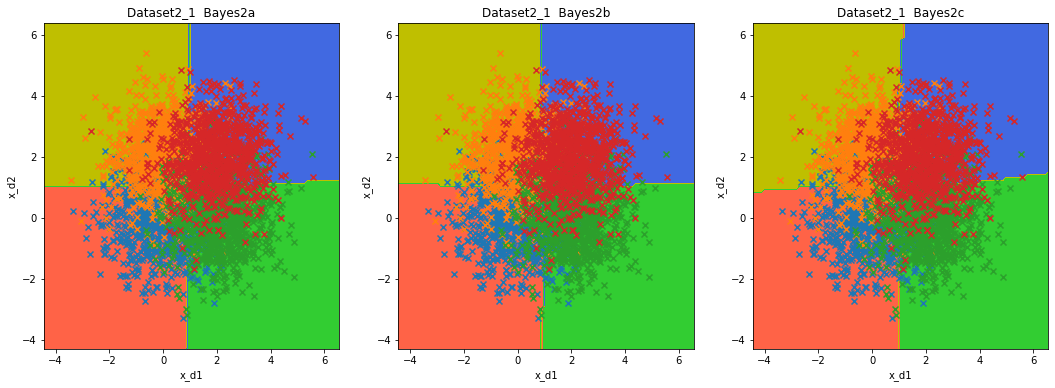

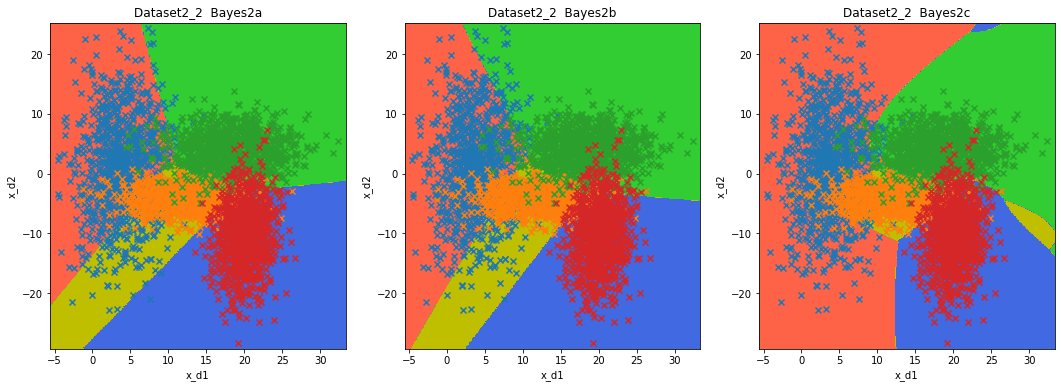

In [18]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

def plots(data, nam):
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    
    
    min1, max1 = X_test[:, 0].min()-1, X_test[:, 0].max()+1
    min2, max2 = X_test[:, 1].min()-1, X_test[:, 1].max()+1
    
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    
    xx, yy = np.meshgrid(x1grid, x2grid)
    
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1,r2))
    
    fig = plt.figure(figsize=(18, 6))
    
    Y_pred_test_2a = Bayes2a(X_train, Y_train, grid)
    zz = Y_pred_test_2a.reshape(xx.shape)
    
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.contourf(xx, yy, zz, colors=['tomato', 'limegreen', 'y', 'royalblue'])
    ax1.scatter(X_test[Y_test == 1, 0], X_test[Y_test == 1, 1], cmap='hot', marker='x')
    ax1.scatter(X_test[Y_test == 2, 0], X_test[Y_test == 2, 1], cmap='hot', marker='x')
    ax1.scatter(X_test[Y_test == 3, 0], X_test[Y_test == 3, 1], cmap='hot', marker='x')
    ax1.scatter(X_test[Y_test == 4, 0], X_test[Y_test == 4, 1], cmap='hot', marker='x')
    ax1.set_title('Dataset2_' + str(nam) + '  Bayes2a')
    ax1.set_xlabel('x_d1')  
    ax1.set_ylabel('x_d2')
    
    
    Y_pred_test_2b = Bayes2b(X_train, Y_train, grid)
    zz = Y_pred_test_2b.reshape(xx.shape)
    
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.contourf(xx, yy, zz, colors=['tomato', 'limegreen', 'y', 'royalblue'])
    ax2.scatter(X_test[Y_test == 1, 0], X_test[Y_test == 1, 1], cmap='hot', marker='x')
    ax2.scatter(X_test[Y_test == 2, 0], X_test[Y_test == 2, 1], cmap='hot', marker='x')
    ax2.scatter(X_test[Y_test == 3, 0], X_test[Y_test == 3, 1], cmap='hot', marker='x')
    ax2.scatter(X_test[Y_test == 4, 0], X_test[Y_test == 4, 1], cmap='hot', marker='x')
    ax2.set_title('Dataset2_' + str(nam) + '  Bayes2b')
    ax2.set_xlabel('x_d1')  
    ax2.set_ylabel('x_d2')
    
    
    Y_pred_test_2c = Bayes2c(X_train, Y_train, grid)
    zz = Y_pred_test_2c.reshape(xx.shape)
    
    ax3 = fig.add_subplot(1, 3, 3)
    ax3.contourf(xx, yy, zz, colors=['tomato', 'limegreen', 'y', 'royalblue'])
    ax3.scatter(X_test[Y_test == 1, 0], X_test[Y_test == 1, 1], cmap='hot', marker='x')
    ax3.scatter(X_test[Y_test == 2, 0], X_test[Y_test == 2, 1], cmap='hot', marker='x')
    ax3.scatter(X_test[Y_test == 3, 0], X_test[Y_test == 3, 1], cmap='hot', marker='x')
    ax3.scatter(X_test[Y_test == 4, 0], X_test[Y_test == 4, 1], cmap='hot', marker='x')
    ax3.set_title('Dataset2_' + str(nam) + '  Bayes2c')
    ax3.set_xlabel('x_d1')  
    ax3.set_ylabel('x_d2')  
    

plots(np.load('../../Data/dataset2_1.npz'), 1)
plots(np.load('../../Data/dataset2_2.npz'), 2)

** Cell type : TextWrite ** 
(Write your observations and table of errors here)

<b>Observations</b><br><br>
i) dataset2_1 seems to be containing classes distributed as gaussian with identity matrix and so all Bayes2_ classifer gives almost same expected loss<br>
ii) dataset2_2 have classes with different distibutions i.e. different covariance matrices and hence Bayes2_c gives lowest expected loss.<br> 

<b>Expected Loss</b>=sum of elements of (confusion matrix.*Loss matrix)(element wise multiplication)
<br><br>

|            | Bayes2a | Bayes2b | Bayes2c |
|------------|---------|---------|---------|
| dataset2_1 | 1736    | 1731    | 1728    |
| dataset2_2 | 734     | 754     | 566     |


<b>Confusion matrices</b><br><br>
dataset2_1<br><br>
i)Bayes2a

|              | pred_class=1 | pred_class=2 | pred_class=3 | pred_class=4 |
|--------------|--------------|--------------|--------------|--------------|
| true_class=1 | 700          | 152          | 126          | 22           |
| true_class=2 | 138          | 697          |  26          | 139          |
| true_class=3 | 115          |  22          | 733          | 130          |
| true_class=4 |  24          | 123          | 124          | 729          |


ii)Bayes2b

|              | pred_class=1 | pred_class=2 | pred_class=3 | pred_class=4 |
|--------------|--------------|--------------|--------------|--------------|
| true_class=1 | 705          | 147          | 126          |  22          |
| true_class=2 | 147          | 696          |  25          | 140          |
| true_class=3 | 126          |  22          | 733          | 130          |
| true_class=4 | 22           | 123          | 122          | 731          |


iii)Bayes2c

|              | pred_class=1 | pred_class=2 | pred_class=3 | pred_class=4 |
|--------------|--------------|--------------|--------------|--------------|
| true_class=1 | 700          | 153          | 125          |  22          |
| true_class=2 | 140          | 699          |  26          | 135         |
| true_class=3 | 115          |  22          | 733          | 130          |
| true_class=4 |  24          | 121          | 127          | 728          |


<br><br>

dataset2_2<br>

i)Bayes2a

|              | pred_class=1 | pred_class=2 | pred_class=3 | pred_class=4 |
|--------------|--------------|--------------|--------------|--------------|
| true_class=1 | 830          | 150          | 18           | 2            |
| true_class=2 | 93           | 784          | 46           | 77           |
| true_class=3 | 30           | 61           | 905          | 4            |
| true_class=4 | 0            | 23           | 78           | 899          |


ii)Bayes2b

|              | pred_class=1 | pred_class=2 | pred_class=3 | pred_class=4 |
|--------------|--------------|--------------|--------------|--------------|
| true_class=1 | 844          | 113          |  42          |   1          |
| true_class=2 | 106          | 765          |  52          |  77          |
| true_class=3 |  25          |  64          | 908          |   3          |
| true_class=4 |   0          |  17          |  91          | 892          |

iii)Bayes2c

|              | pred_class=1 | pred_class=2 | pred_class=3 | pred_class=4 |
|--------------|--------------|--------------|--------------|--------------|
| true_class=1 | 901          |  79          |  20          | 0            |
| true_class=2 |  65          | 829          |  29          | 77           |
| true_class=3 |  19          |  34          | 931          | 16           |
| true_class=4 |   0          |  36          |  39          | 925          |

**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




[ 0.50077229  0.22640318 -0.22049711]
Degree= 1 lambda= 1e-07
Bias = 0.0531765
Variance = 0.0035774
MSE = 0.0567539
[ 0.49767703  0.22003143 -0.23229891]
Degree= 1 lambda= 1e-05
Bias = 0.0532218
Variance = 0.0035912
MSE = 0.056813
[ 0.50410684  0.23038177 -0.21387089]
Degree= 1 lambda= 0.001
Bias = 0.053218
Variance = 0.0033815
MSE = 0.056599500000000004
[ 0.50662569  0.23413872 -0.22876028]
Degree= 1 lambda= 0.1
Bias = 0.0531996
Variance = 0.0039782
MSE = 0.0571778
[ 0.41395762  0.14704425 -0.14286982]
Degree= 1 lambda= 10.0
Bias = 0.0652532
Variance = 0.0017327
MSE = 0.0669859
[ 0.02359982  0.00342257 -0.0033253 ]
Degree= 1 lambda= 1000.0
Bias = 0.3135367
Variance = 6.6e-06
MSE = 0.3135433
Degree= 2 lambda= 1e-07
Bias = 0.0340683
Variance = 0.0053292
MSE = 0.0393975
Degree= 2 lambda= 1e-05
Bias = 0.0340385
Variance = 0.0045354
MSE = 0.0385739
Degree= 2 lambda= 0.001
Bias = 0.0341723
Variance = 0.0055379
MSE = 0.0397102
Degree= 2 lambda= 0.1
Bias = 0.0340738
Variance = 0.0053417
MSE =

/home/lordguna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:178: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/lordguna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:131: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Degree= 2 lambda= 10.0
Bias = 0.0617289
Variance = 0.0016097
MSE = 0.06333860000000001
Degree= 2 lambda= 1000.0
Bias = 0.3096629
Variance = 7e-06
MSE = 0.3096699
Degree= 4 lambda= 1e-07
Bias = 0.0069809
Variance = 0.0138049
MSE = 0.0207858
Degree= 4 lambda= 1e-05
Bias = 0.0070762
Variance = 0.0074281
MSE = 0.014504300000000001
Degree= 4 lambda= 0.001
Bias = 0.0064878
Variance = 0.0070957
MSE = 0.0135835
Degree= 4 lambda= 0.1
Bias = 0.009357
Variance = 0.0044492
MSE = 0.013806200000000001
Degree= 4 lambda= 10.0
Bias = 0.0591752
Variance = 0.0019952
MSE = 0.0611704
Degree= 4 lambda= 1000.0
Bias = 0.3085063
Variance = 9.2e-06
MSE = 0.3085155
Degree= 8 lambda= 1e-07
Bias = 0.0069148
Variance = 0.1501239
MSE = 0.1570387
Degree= 8 lambda= 1e-05
Bias = 0.0023588
Variance = 0.0463396
MSE = 0.0486984
Degree= 8 lambda= 0.001
Bias = 0.0043343
Variance = 0.0159073
MSE = 0.0202416
Degree= 8 lambda= 0.1
Bias = 0.0092231
Variance = 0.0055727
MSE = 0.0147958
Degree= 8 lambda= 10.0
Bias = 0.0554483
Var

<Figure size 432x288 with 0 Axes>

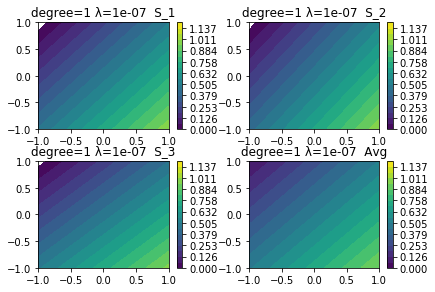

<Figure size 432x288 with 0 Axes>

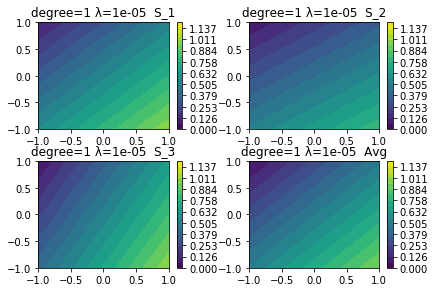

<Figure size 432x288 with 0 Axes>

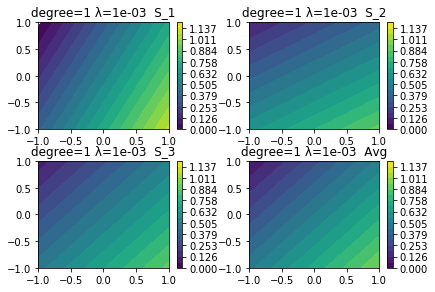

<Figure size 432x288 with 0 Axes>

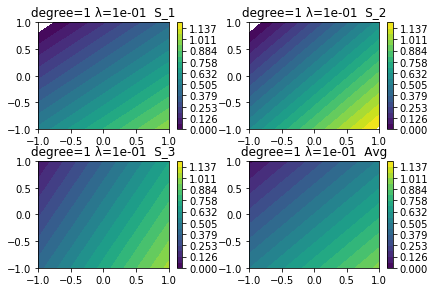

<Figure size 432x288 with 0 Axes>

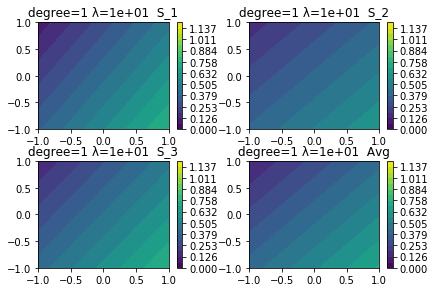

<Figure size 432x288 with 0 Axes>

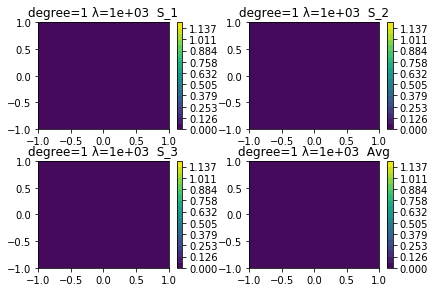

<Figure size 432x288 with 0 Axes>

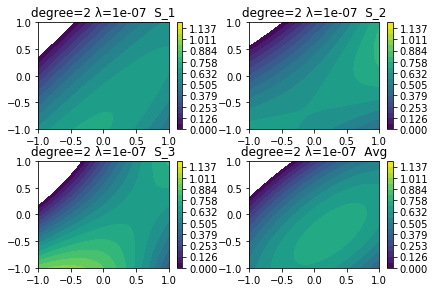

<Figure size 432x288 with 0 Axes>

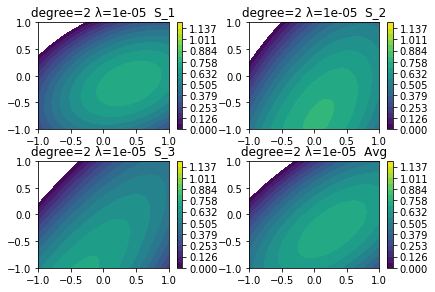

<Figure size 432x288 with 0 Axes>

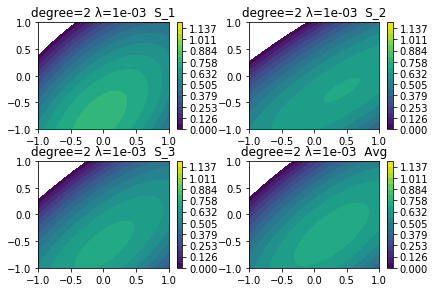

<Figure size 432x288 with 0 Axes>

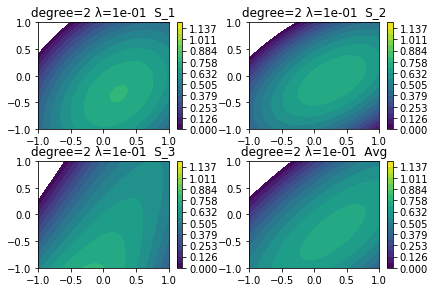

<Figure size 432x288 with 0 Axes>

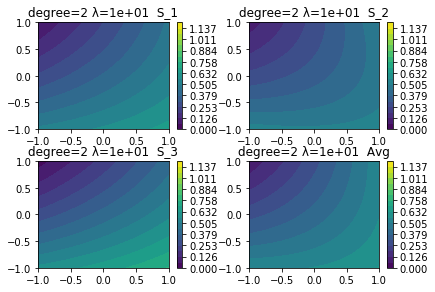

<Figure size 432x288 with 0 Axes>

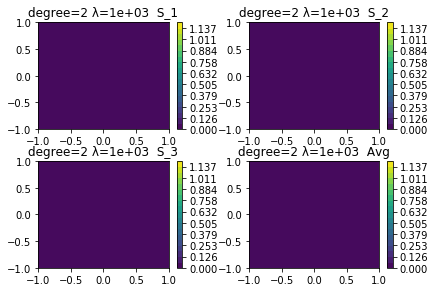

<Figure size 432x288 with 0 Axes>

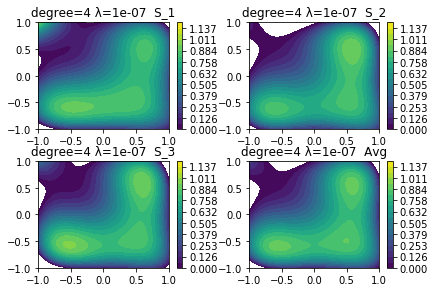

<Figure size 432x288 with 0 Axes>

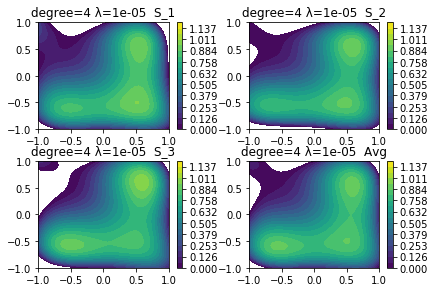

<Figure size 432x288 with 0 Axes>

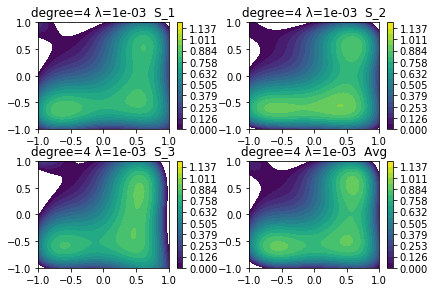

<Figure size 432x288 with 0 Axes>

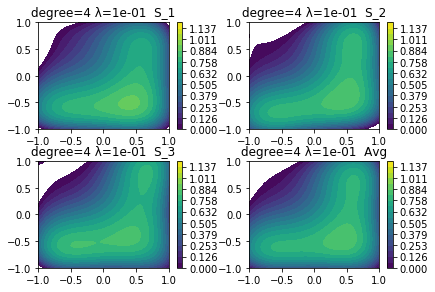

<Figure size 432x288 with 0 Axes>

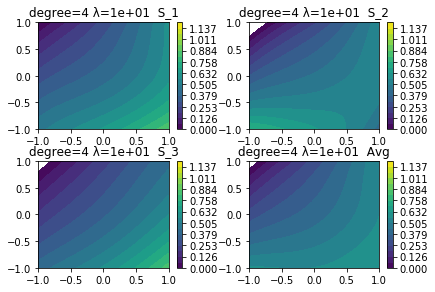

<Figure size 432x288 with 0 Axes>

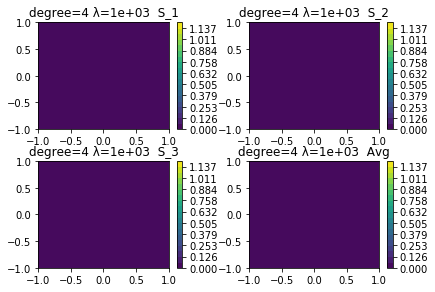

<Figure size 432x288 with 0 Axes>

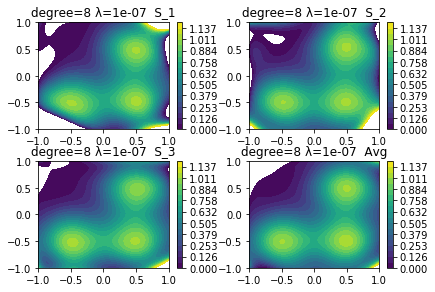

<Figure size 432x288 with 0 Axes>

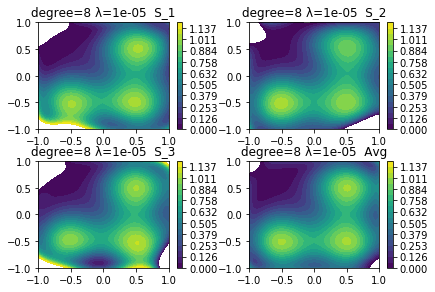

<Figure size 432x288 with 0 Axes>

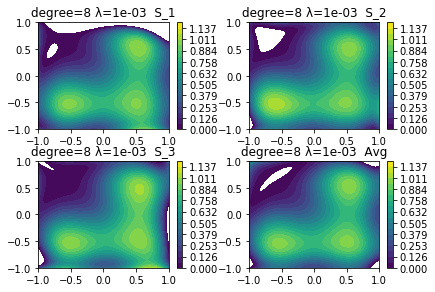

<Figure size 432x288 with 0 Axes>

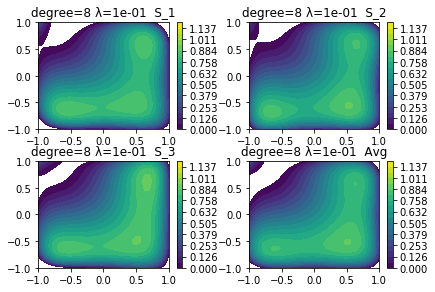

<Figure size 432x288 with 0 Axes>

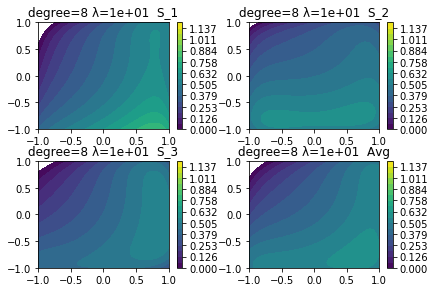

<Figure size 432x288 with 0 Axes>

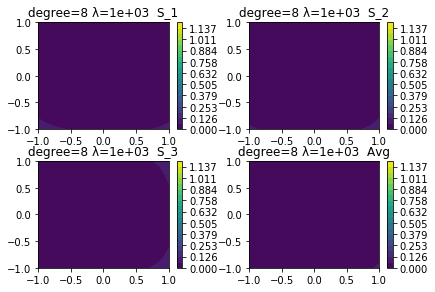

<Figure size 432x288 with 0 Axes>

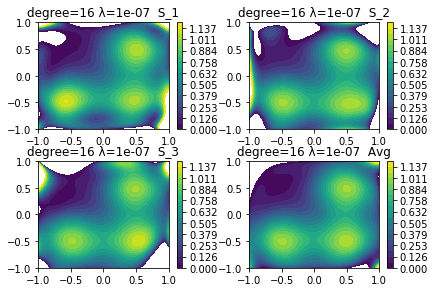

<Figure size 432x288 with 0 Axes>

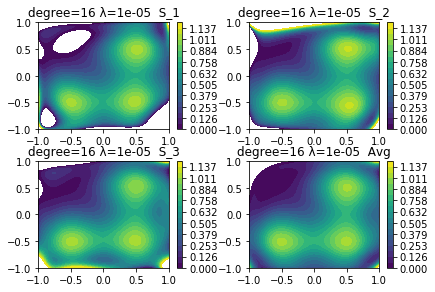

<Figure size 432x288 with 0 Axes>

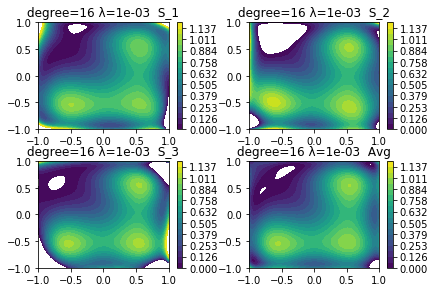

<Figure size 432x288 with 0 Axes>

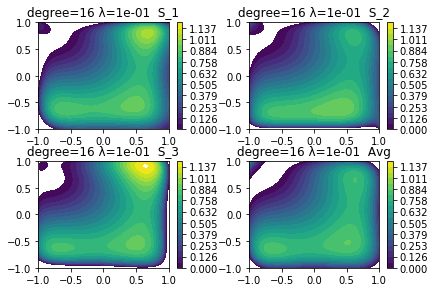

<Figure size 432x288 with 0 Axes>

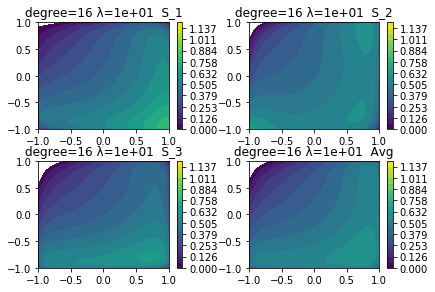

<Figure size 432x288 with 0 Axes>

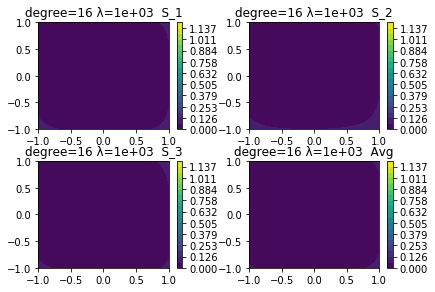

In [19]:
# Cell type : CodeWrite

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    X_test_d1 = X_test[:,0]
    X_test_d2 = X_test[:,1]

    d = (degree+2)*(degree+1)//2
    phe_matrix=np.empty((len(X_test), 0))
    
    for i in range(degree+1):
        for j in range(degree+1):
            if i+j <= degree: 
                temp = np.expand_dims((X_test_d1**j)*(X_test_d2**i), axis=1)
                phe_matrix=np.concatenate((phe_matrix, temp), axis=1)
            else:
                break
    
    wt_vector = np.expand_dims(wt_vector, axis=1)  
    Y_test_pred = np.dot(phe_matrix, wt_vector)
    
    return Y_test_pred

    
    
def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

    # Get Z using other functions
    k = -1
    Z = np.zeros((100,100))
    for i in range(degree+1):
        for j in range(degree+1):
            if i+j <= degree:
                k+=1
                Z+=wt_vector[k]*(X**j)*(Y**i)
            else:
                break
    
    plt.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20))
    plt.title(title)
    plt.colorbar()
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    X_train_d1 = X_train[:,0]
    X_train_d2 = X_train[:,1]

    d = (degree+2)*(degree+1)//2
    phe_matrix=np.empty((len(X_train), 0))
    
    for i in range(degree+1):
        for j in range(degree+1):
            if i+j <= degree: 
                temp = np.expand_dims((X_train_d1**j)*(X_train_d2**i), axis=1)
                phe_matrix=np.concatenate((phe_matrix, temp), axis=1)
            else:
                break 
                    
    I = np.eye(d)
    
    w = np.dot(np.linalg.inv(np.dot(np.transpose(phe_matrix), phe_matrix) + reg_param*I), np.dot(np.transpose(phe_matrix), Y_train)) 
    
    return w
    
    
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """
    d = (degree+2)*(degree+1)//2
    
    wt_matrix = np.zeros(d)
    for _ in range(100):
        idx = np.random.randint(10000, size = num_training_samples)
        wt_matrix = np.vstack((wt_matrix, polynomial_regression_ridge_train(X_data[idx], Y_data[idx], degree, reg_param)))
    
    wt_matrix = wt_matrix[1:]
    
    w_sum = np.zeros(d)
    
    for i in wt_matrix:
        w_sum += i
    w_s_avg = w_sum/100  
    
    if degree == 1:
        print(w_s_avg)
    
    fig, axes = plt.subplots(2,2)
    fig.tight_layout() 
    
    plt.subplot(2,2,1)
    visualise_polynomial_2d(wt_matrix[0], degree, "degree=%i"%degree+" λ=%1.0e"%reg_param+"  S_1")
    
    plt.subplot(2,2,2)
    visualise_polynomial_2d(wt_matrix[1], degree, "degree=%i"%degree+" λ=%1.0e"%reg_param+"  S_2")
    
    plt.subplot(2,2,3)
    visualise_polynomial_2d(wt_matrix[2], degree, "degree=%i"%degree+" λ=%1.0e"%reg_param+"  S_3")
    
    plt.subplot(2,2,4)
    visualise_polynomial_2d(w_s_avg, degree, "degree=%i"%degree+" λ=%1.0e"%reg_param+"  Avg")
    
    X_use = X_data
    Y_use = np.expand_dims(Y_data, axis=1)
    
    Y_pred = polynomial_regression_ridge_pred(X_use, w_s_avg, degree)
    b = (np.subtract(Y_pred, Y_use) ** 2).sum()/len(X_use)
    b = round(b,7)
    
    Y_pred_avg = polynomial_regression_ridge_pred(X_use, w_s_avg, degree)
    v=0
    for i in range(len(wt_matrix)):
        Y_pred_i = polynomial_regression_ridge_pred(X_use, wt_matrix[i], degree)
        v += (np.subtract(Y_pred_i, Y_pred_avg) ** 2).sum()/10000
        
    v = round(v/100,7)
    ##error 
    e=b+v
    return b,v,e

    
a=np.array([.5,.5])
b=np.array([-.5,-.5])
c=np.array([.5,-.5])    

X_data = np.random.uniform(-1,1,(10000,2))                 
Y_data = np.array([])
for i in X_data:
    y = np.exp(-4*(np.linalg.norm(i-a))**2)+np.exp(-4*(np.linalg.norm(i-b))**2)+np.exp(-4*(np.linalg.norm(i-c))**2)
    Y_data = np.append(Y_data,y)
    

for degree in [1,2,4,8,16]:
    for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
        plt.figure()
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))
        

In [20]:
# Cell type: convenience



** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.

<b>Bias</b>

|      | 1         | 2         | 4         | 8         | 16        |
|------|-----------|-----------|-----------|-----------|-----------|
| 1e-7 | 0.0538541 | 0.0344801 | 0.0070242 | 0.0062699 | 0.0184803 |
| 1e-5 | 0.0538987 | 0.0344547 | 0.0075572 | 0.0023067 | 0.0148569 |
| 1e-3 | 0.0538684 | 0.0346483 | 0.0071128 | 0.0056536 | 0.0056798 |
| 1e-1 | 0.0538697 | 0.0348387 | 0.0090355 | 0.0093495 | 0.0112601 |
| 1e1  | 0.0659943 | 0.0617895 | 0.0609694 | 0.055864  | 0.0551472 |
| 1e3  | 0.313681  | 0.3101598 | 0.3089981 | 0.3086311 | 0.307994  |

General Trend from data:<br>
Increasing value of $\lambda$ results in increase in bias almost all the time,<br>
Increasing value of degree results in decrease in bias


<b>Variance</b>

|      | 1         | 2         | 4         | 8         | 16        |
|------|-----------|-----------|-----------|-----------|-----------|
| 1e-7 | 0.003452  | 0.0052842 | 0.0092395 | 0.1885726 | 0.3412797 |
| 1e-5 | 0.0035342 | 0.0037882 | 0.0092837 | 0.0414444 | 0.1459048 |
| 1e-3 | 0.0039935 | 0.0062343 | 0.0077411 | 0.0204112 | 0.0464112 |
| 1e-1 | 0.003931  | 0.0052047 | 0.0039445 | 0.0064507 | 0.012221  |
| 1e1  | 0.0016162 | 0.0020016 | 0.0019882 | 0.0026035 | 0.0023216 |
| 1e3  | 6.2e-06   | 6.8e-06   | 9.7e-06   | 1.55e-05  | 1.69e-05  | 

General Trend from data:<br>
Increasing value of $\lambda$ results in decrease of variance most of the times<br>
Increasing value of degree results in increases variance

** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




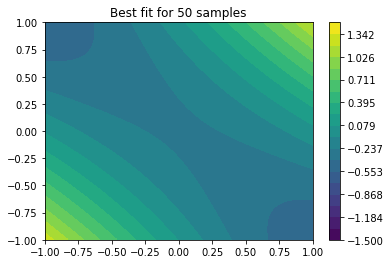

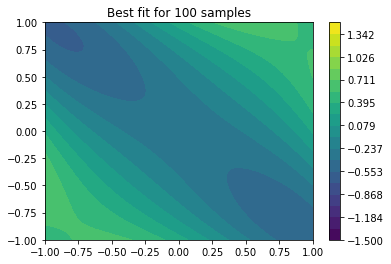

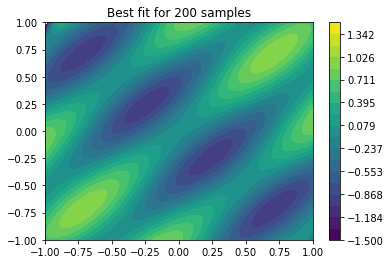

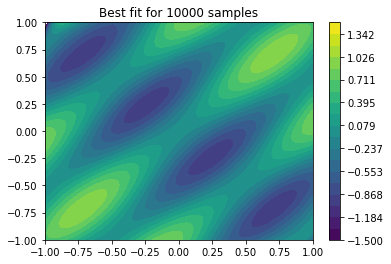

In [21]:
# Cell type : CodeWrite 

data = np.load("../../Data/dataset4_1.npz")
X_train = data['arr_0']
Y_train = data['arr_1']
X_test = data['arr_2']
Y_test = data['arr_3']

train_serr = np.zeros((5,6))    
test_serr = np.zeros((5,6)) 

degrees = [1,2,4,8,16]
reg_params = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]

for num_training_samples in [50, 100, 200, 10000]:
    
    X_train_sub = X_train[:num_training_samples]
    Y_train_sub = Y_train[:num_training_samples]
    i = 0
    for degree in degrees:
        j = 0
        for reg_param in reg_params:
            d = (degree+2)*(degree+1)//2

            wt_matrix = polynomial_regression_ridge_train(X_train_sub, Y_train_sub, degree, reg_param)
            Y_train_pred = polynomial_regression_ridge_pred(X_train, wt_matrix, degree)
            Y_test_pred = polynomial_regression_ridge_pred(X_test, wt_matrix, degree)
            
            train_serr[i][j] = (np.subtract(Y_train_pred, np.expand_dims(Y_train, axis=1)) ** 2).sum()/len(X_train)
            test_serr[i][j] = (np.subtract(Y_test_pred, np.expand_dims(Y_test, axis=1)) ** 2).sum()/len(X_test)
            j += 1
        i += 1
    best_i = np.argmin(test_serr)
    best_j = best_i%6
    best_i = best_i//6
    
    best_d = degrees[best_i]
    best_rp = reg_params[best_j]
    
    wt_best = polynomial_regression_ridge_train(X_train, Y_train, best_d, best_rp)
    
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

    k = -1
    Z = np.zeros((100,100))
    for i in range(best_d+1):
        for j in range(best_d+1):
            if i+j <= best_d:
                k += 1
                Z += wt_best[k]*(X**j)*(Y**i)
            else:
                break
    plt.figure()
    plt.contourf(X,Y,Z,levels=np.linspace(-1.5, 1.5, 20))
    plt.title('Best fit for '+str(num_training_samples)+' samples')
    plt.colorbar()


** Cell type : TextWrite **

Obervation :
As expected from above question the case with high degree and small regularised parameter gives best results, though for small sample set is not sufficient to conclude, we can say based on large sample sets

<b>Best degree/Regular parameter table</b>:

| Size  | Degree  |  Parameter
|---|---|---|
|  50 |  2 | 0.1  |  
| 100  | 4  |  1e-09 
| 200  |  16 | 1e-09 
| 1000  | 16  | 1e-09 

<b>no_samples</b>=50<br><br>
Train error

|    | 1e-9   | 1e-7   | 1e-5   | 1e-3    | 1e-1   | 1e1    |
|----|--------|--------|--------|---------|--------|--------|
| 1  | .27426 | .27426 | .27426 | .27422  | .27387 | .25385 |
| 2  | .15640 | .15640 | .15640 | .15638  | .15470 | .19151 |
| 4  | .15542 | .15542 | .15542 | .15531  | .15768 | .18084 |
| 8  | 184.69 | 131.83 | 14.143 | .78045  | .16142 | .17845 |
| 16 | 195.67 | 172.67 | 49.586 | 1.8305  | .19669 | .18027 |


Test error

|    | 1e-9      | 1e-7      | 1e-5     | 1e-3    | 1e-1   | 1e1    |
|----|-----------|-----------|----------|---------|--------|--------|
| 1  | .30127    | .30127    | .30127   | .30126  | .30084 | .27835 |
| 2  | .1579     | .1579     | .1579    | .15789  | .15674 | .20822 |
| 4  | .15733    | .15733    | .15733   | .15724  | .16183 | .19657 |
| 8  | 237.69006 | 172.50186 | 18.59425 | .99025  | .16516 | .19392 |
| 16 | 250.52133 | 232.02482 | 66.69768 | 2.33731 | .20936 | .19606 |


<b>no_samples</b>=100<br><br>
Train error

|    | 1e-9   | 1e-7   | 1e-5   | 1e-3   | 1e-1   | 1e1    |
|----|--------|--------|--------|--------|--------|--------|
| 1  | .24924 | .24924 | .24924 | .24924 | .24919 | .24533 |
| 2  | .15035 | .15035 | .15035 | .15034 | .14987 | .16365 |
| 4  | .14219 | .14219 | .14219 | .14220 | .14343 | .15771 |
| 8  | .58262 | .58135 | .47779 | .17302 | .15363 | .15941 |
| 16 | 40.8856| 6.4214 | 8.5449 | .27611 | .17611  | .16158 |


Test error

|    | 1e-9     | 1e-7     | 1e-5     | 1e-3   | 1e-1   | 1e1    |
|----|----------|----------|----------|--------|--------|--------|
| 1  | .27315   | .27315   | .27315   | .27315 | .27308 | .26862 |
| 2  | .15321   | .15321   | .15321   | .15321 | .15292 | .17571 |
| 4  | .14278   | .14278   | .14278   | .14281 | .14602 | .16898 |
| 8  | .71292   | .71132   | .58076   | .20364 | .16263 | .17117 |
| 16 | 54.08014 | 11.77042 | 23.41659 | .41785 | .18836 | .17416 |


<b>no_samples</b>=200<br><br>
Train error

|    | 1e-9   | 1e-7   | 1e-5   | 1e-3   | 1e-1   | 1e1    |
|----|--------|--------|--------|--------|--------|--------|
| 1  | .24607 | .24607 | .24607 | .24607 | .24606 | .24481 |
| 2  | .14274 | .14274 | .14274 | .14274 | .14264 | .15041 |
| 4  | .13227 | .13227 | .13227 | .13226 | .13111 | .14862 |
| 8  | .11278 | .11278 | .11256 | .10232 | .11411 | .14771 |
| 16 | .01853 | .03777 | .05960 | .07406 | .10820 | .14398 |

Test error

|    | 1e-9   | 1e-7   | 1e-5   | 1e-3   | 1e-1   | 1e1    |
|----|--------|--------|--------|--------|--------|--------|
| 1  | .26766 | .26766 | .26766 | .26766 | .26765 | .26623 |
| 2  | .14578 | .14578 | .14578 | .14578 | .14575 | .15868 |
| 4  | .13117 | .13117 | .13117 | .13116 | .13083 | .15709 |
| 8  | .13736 | .13736 | .13698 | .11818 | .11397 | .15645 |
| 16 | .03715 | .08371 | .1081  | .0869  | .11121 | .15224 |

<b>no_samples</b>=1000<br><br>

Train error

|    | 1e-9   | 1e-7   | 1e-5   | 1e-3   | 1e-1   | 1e1    |
|----|--------|--------|--------|--------|--------|--------|
| 1  | .24073 | .24073 | .24073 | .24073 | .24073 | .24073 |
| 2  | .13882 | .13882 | .13882 | .13882 | .13882 | .13972 |
| 4  | .12502 | .12502 | .12502 | .12502 | .12503 | .13417 |
| 8  | .07674 | .07674 | .07674 | .07685 | .09484 | .12844 |
| 16 | 3e-5   | .00045 | .00653 | .03842 | .08499 | .12169 |

Test error

|    | 1e-9   | 1e-7   | 1e-5   | 1e-3   | 1e-1   | 1e1    |
|----|--------|--------|--------|--------|--------|--------|
| 1  | .26253 | .26253 | .26253 | .26253 | .26253 | .26253 |
| 2  | .14243 | .14243 | .14243 | .14243 | .14244 | .14452 |
| 4  | .12708 | .12708 | .12708 | .12708 | .12724 | .14094 |
| 8  | .08481 | .08481 | .08488 | .08391 | .09782 | .13499 |
| 16 | .0012  | .00149 | .01096 | .04966 | .09074 | .12782 |

** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.












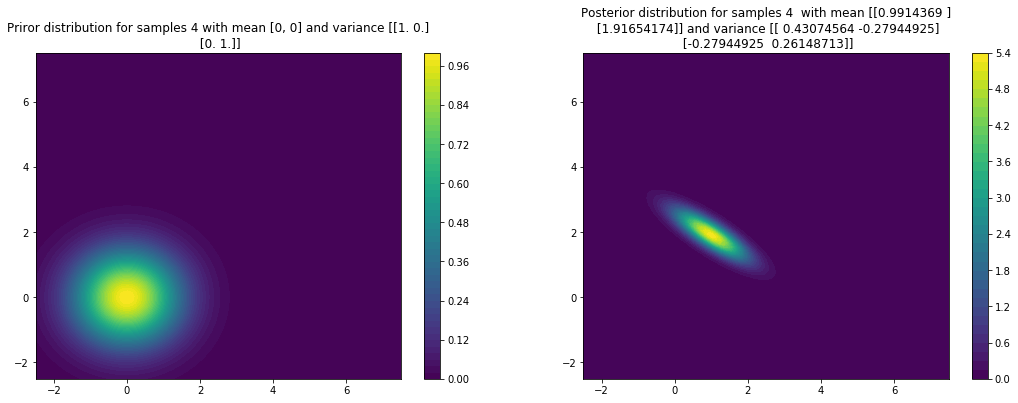

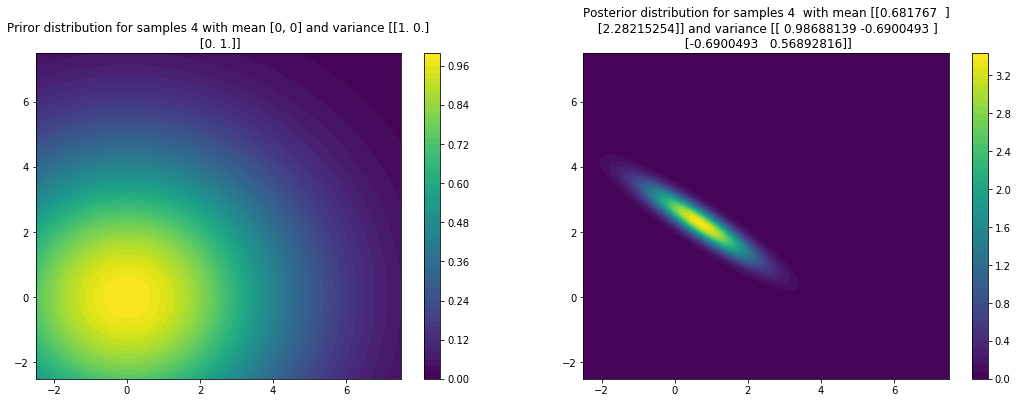

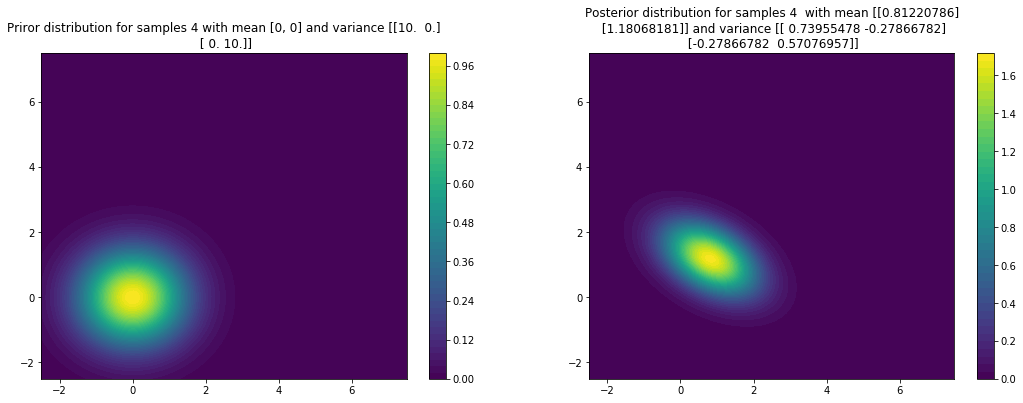

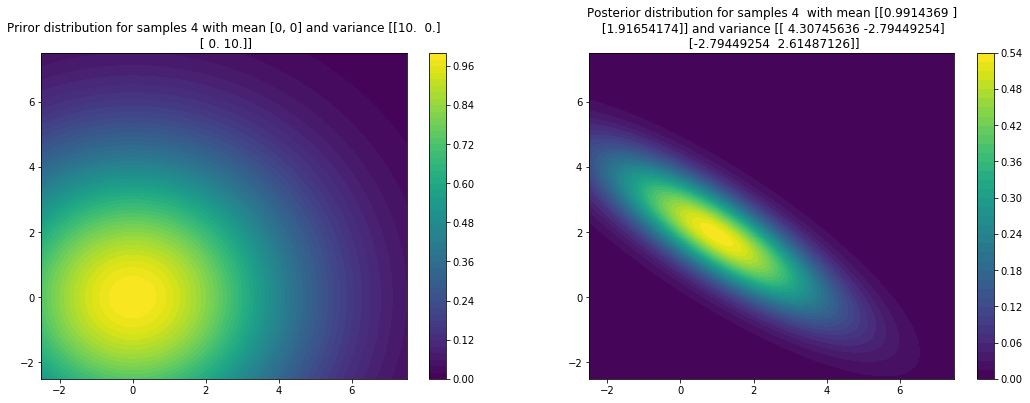

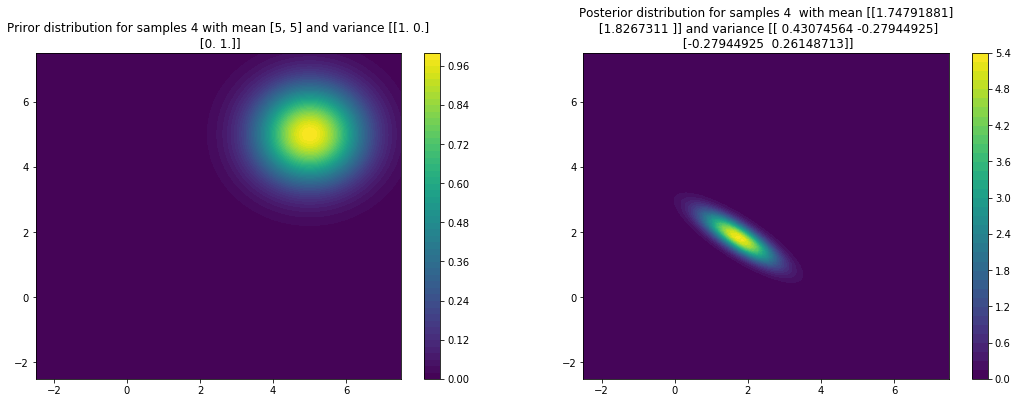

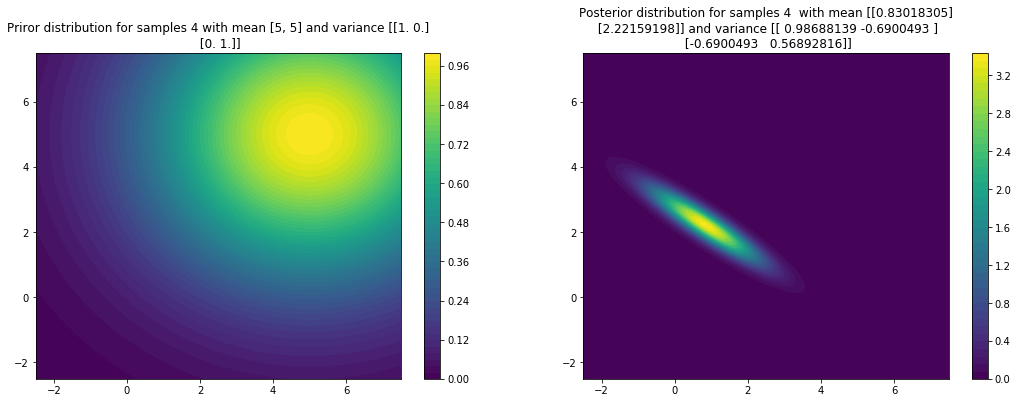

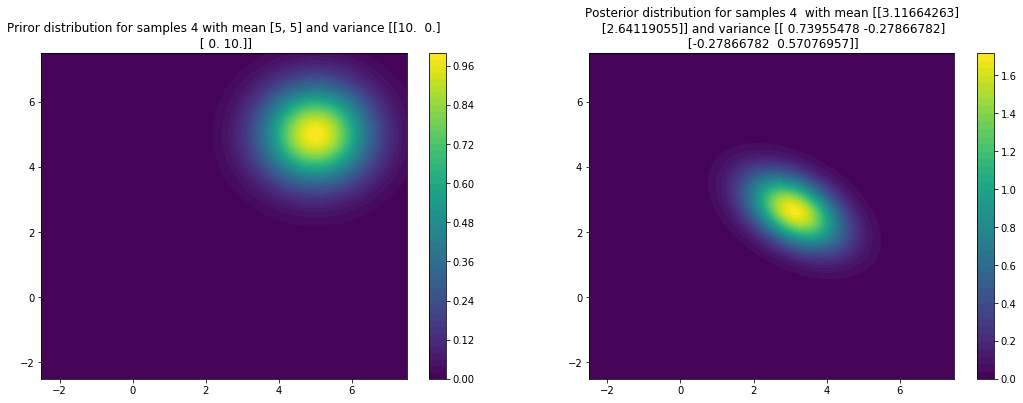

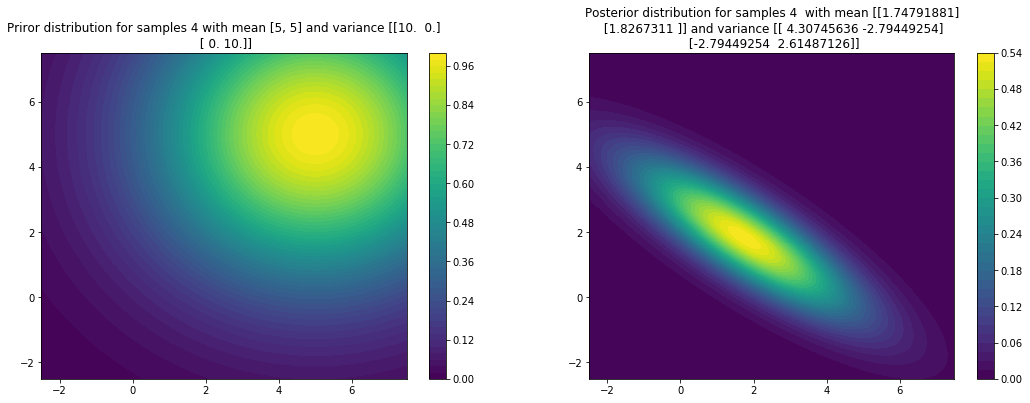

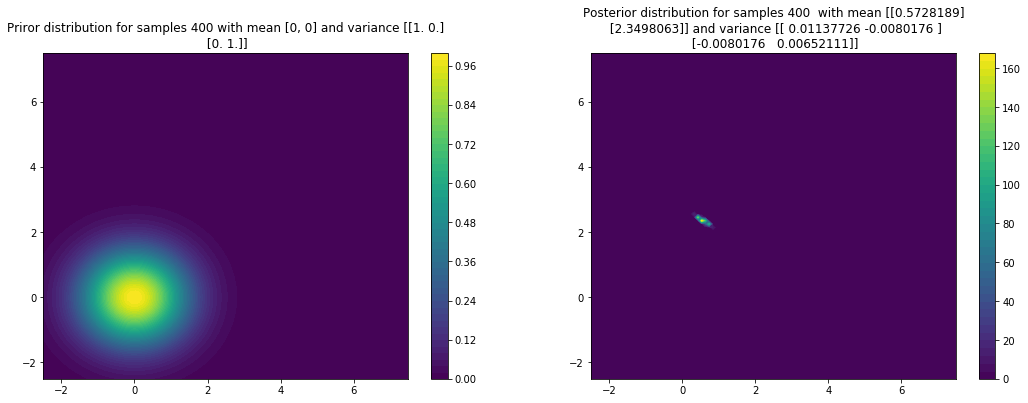

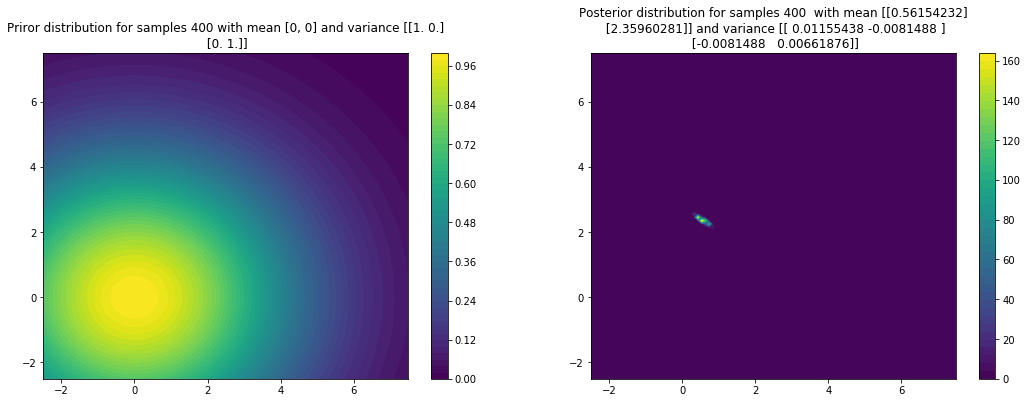

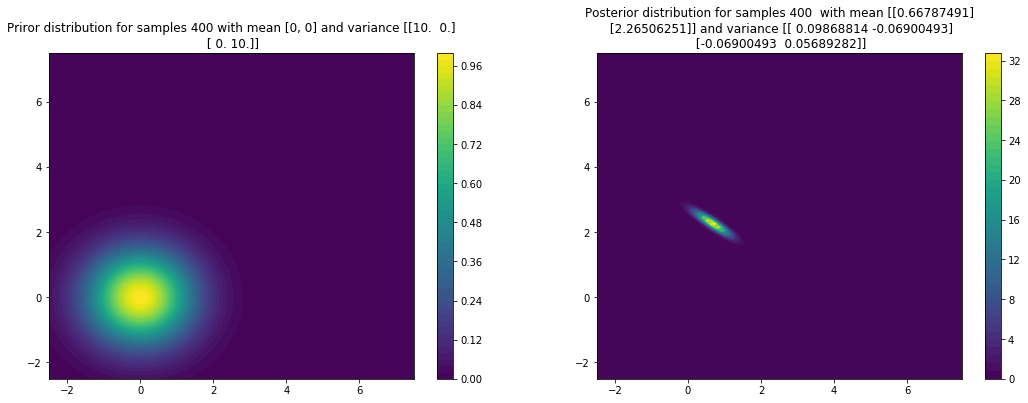

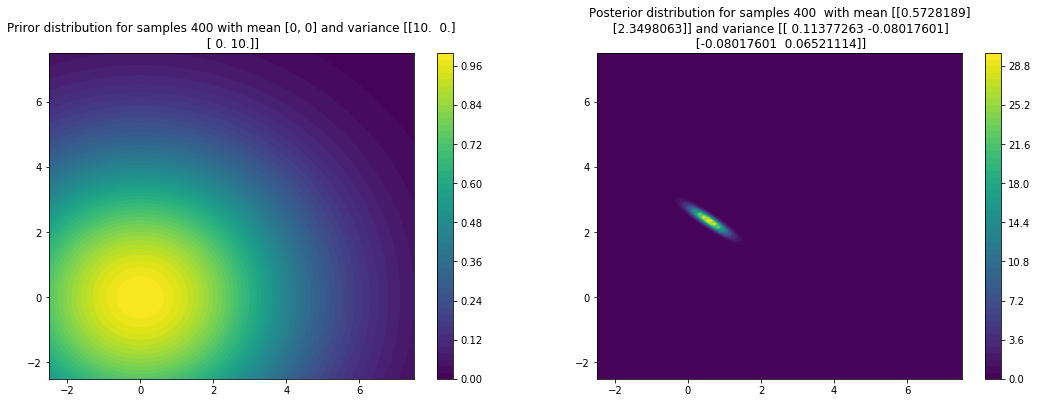

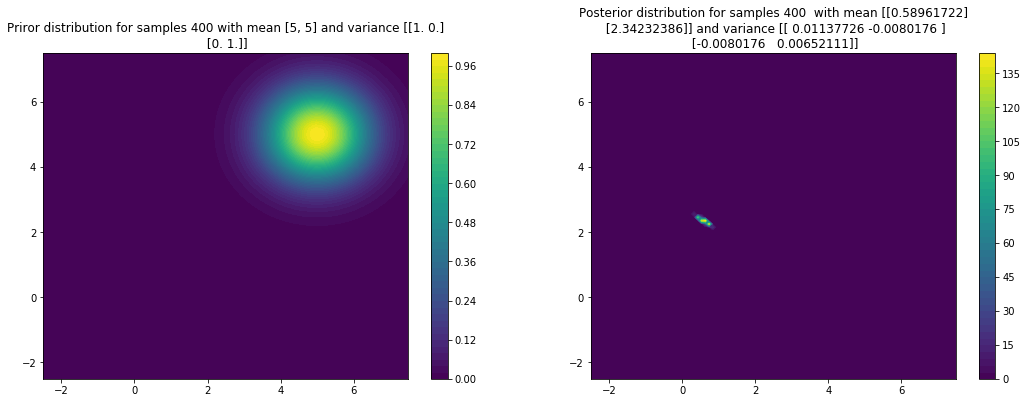

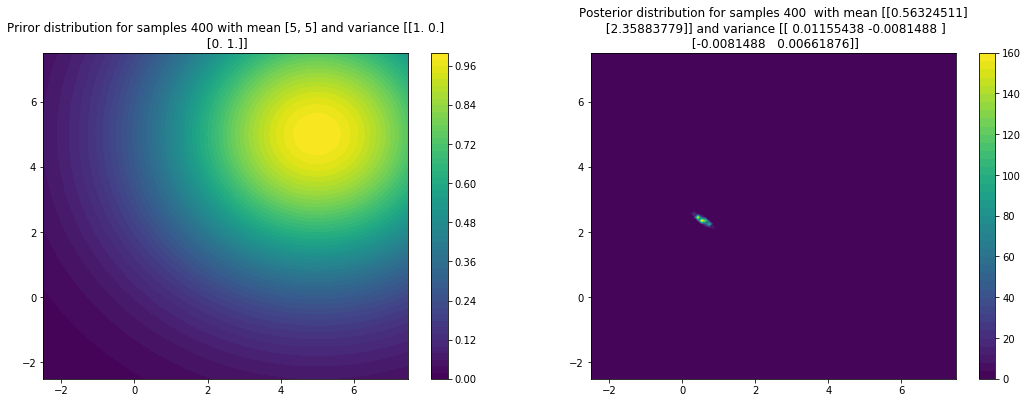

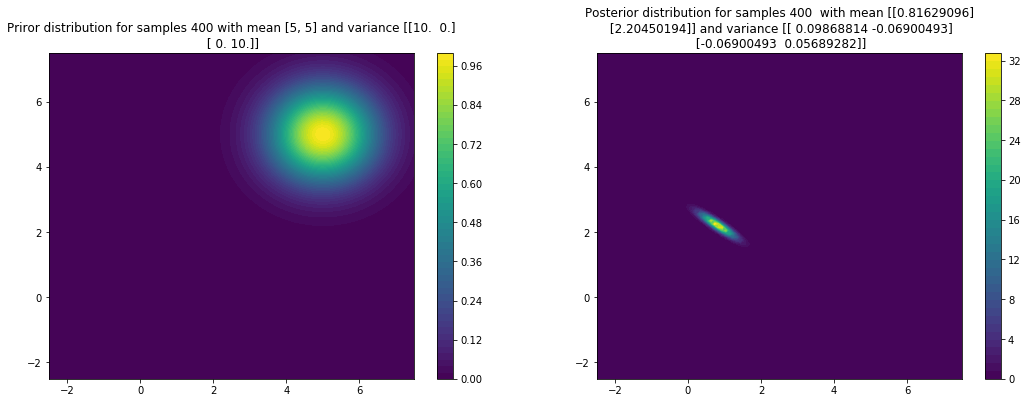

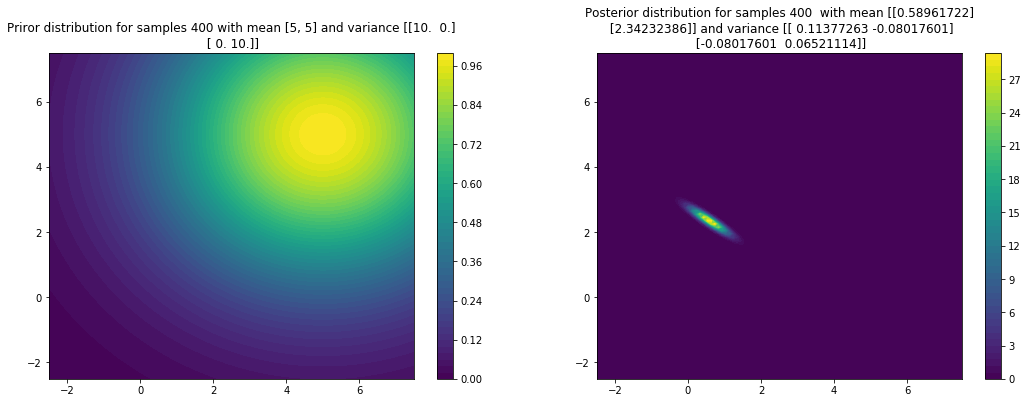

In [22]:
# Cell type : CodeWrite 
def f(X_train, Y_train):
    for mu in [0, 5]:
        for sig in [1, 10]:
            for tau in [1, 10]:
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
                #prior distribution
                X,Y = np.meshgrid(np.linspace(-2.5,7.5,100), np.linspace(-2.5,7.5,100))
                
                Z_pr = np.exp(-1*((X-mu)**2+(Y-mu)**2)/(2*tau))
                
                ax1.set_title('Priror distribution for samples '+str(len(Y_train))+' with mean ' + str([mu, mu]) + ' and variance ' + str(sig*np.eye(2)))
                pcm = ax1.contourf(X,Y,Z_pr,50)
                fig.colorbar(pcm, ax=ax1)
                
                #posterior distribution
                m_0 = np.array([[mu], [mu]])
                s_n = sig*np.linalg.inv(np.dot(np.transpose(X_train), X_train)+sig*np.eye(2)/tau)
                m_n = np.dot(s_n, (m_0/tau + np.dot(np.transpose(X_train), Y_train)/sig))
                
                Z_po = np.zeros((100, 100))
                for i in range(100):
                    for j in range(100):
                        x = np.expand_dims(np.array([X[i][j], Y[i][j]]), axis=1)
                        xm = np.expand_dims(np.array([mu, mu]), axis=1)
                        Z_po[i][j] = np.exp(-.5*np.dot(np.transpose(x-m_n), np.dot(np.linalg.inv(s_n), x-m_n)))/np.sqrt(np.linalg.det(s_n))
                
                ax2.set_title('Posterior distribution for samples '+str(len(Y_train))+'  with mean ' + str(m_n) + ' and variance ' + str(s_n))              
                pcm = ax2.contourf(X,Y,Z_po,50)
                fig.colorbar(pcm, ax=ax2)
                


x1 = np.array([[1.0, 2.0, 0.6, 1.1]])
x2 = np.array([[2.0, 2.1, 1.5, 0.9]])
X_train = np.transpose(np.concatenate((x1, x2), axis = 0))
Y_train = np.expand_dims(np.array([5.1, 6.1, 4.2, 2.9]), axis=1)
f(X_train, Y_train)

xd1 = x1
xd2 = x2
Yd = np.empty((4,1))
for _ in range(99):
    xd1 = np.concatenate((xd1, x1), axis = 1)
    xd2 = np.concatenate((xd2, x2), axis = 1)
    Yd = np.concatenate((Yd, Y_train), axis = 0)
Xd = np.transpose(np.concatenate((xd1, xd2), axis = 0))
f(Xd, Yd)

** Cell type : TextWrite **
<b> Observation </b>

i)Given small dataset (4 samples) implies trust in prior data is high which reflects in close values of mean and variance of prior and posterior distribution, also contours are comparetively close

ii)But when large dataset is taken (400 samples), the estimated values of mean and variance of posterior distribution are far off from prior datas mean and variance, impliying we dont trust the prior information and depend mostly on obtained data, which is also reflected in contours as they are compleletly different from what happened in case 1

iii)Increasing value of tau implies lesser the trust in prior information which is why we noticed higher difference in mean and variance when tau increases

iv)Also increasing value of sigma implies less trust in generated data which is why we noticed smaller difference in mean and variance when sigma increases, as we weight the prior information more in such cases